#Frame
Startup.ai and objective is to give out loans ( non-asset backed loans ). You have really high defaults.

#acquire

where do we get data from:
-flat files (csv,tsv)
-Databases - {pandas, sql-alchemy}
-API {requests}
-Scraping {beautiful-soup, scrapy}

Data Size Implementation
-Small to Medium(In-Memory): pandas, modin- improves performance of pandas
-Medium to Large(in-HDD):dask
-Large to Extra-Large(Cluster): spark

outcome variables:
levlel 1 - default
level 0 as amount given

Demographic Variables

- age
-Income
-years
-ownership

Behavioural variables
-grade
-amount





default - whether defaulted (1) or not (0)
amout - amount lent out to the client
guide - quivalent to FICO/CBIL scores (A>B>C)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("historical_loan.csv")

In [3]:
df.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


#Refine
-Missing Values
-Quality of the Data
-Outliers
-Standardize e.g. Bengaluru & Bangalore


In [6]:
#missing values
df.isnull()

,default,amount,grade,years,ownership,income,age
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

In [ ]:
Missing Value Treatment

1.Remove the column or rows
2.Statistical Impute
-statistical measure - median is a better one
    - Nominal, Ordinal: MOde, Create New Category
    -Ratio:Median, Mean
    -Interval:Forward- last known value, Backward - Next value
    
3.Domain Specific/fixed Number : 9999
4. Binning/ convert to categorical
5. Model:Nearest Neighbour


In [8]:
df.years = df.years.fillna(np.mean(df.years))

In [9]:
df.years.unique()

array([ 2.       ,  3.       ,  1.       ,  6.       ,  4.       ,
        0.       , 16.       , 12.       , 11.       , 15.       ,
        6.0863319, 18.       ,  8.       ,  7.       , 34.       ,
        9.       , 14.       ,  5.       , 10.       , 20.       ,
       26.       , 19.       , 24.       , 61.       , 27.       ,
       21.       , 13.       , 30.       , 23.       , 22.       ,
       31.       , 25.       , 17.       , 38.       , 28.       ,
       29.       , 56.       , 47.       , 45.       , 43.       ,
       32.       , 33.       , 36.       , 40.       , 44.       ,
       53.       , 41.       , 55.       , 62.       , 48.       ,
       37.       , 35.       ])

In [ ]:
Class Balanced(60/40, 70/30) - Normal Classification Process
UnBalanced (90/10, 95/5) - sklearn-unbalanced
-class_weight hyperparameter
-sklearn-unbalanced
Anomaly Detection/ Severely unbalanced (99.9/0.01)
    - PCA-based Techniques
    -domain cases
    


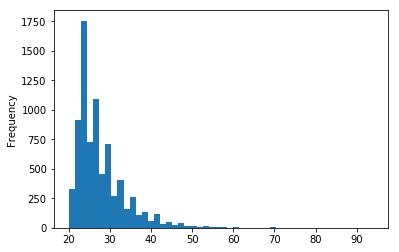

In [11]:
df.age.plot.hist(bins =50)

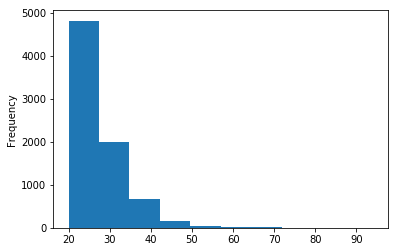

In [12]:
df.age.plot.hist(bins =10)

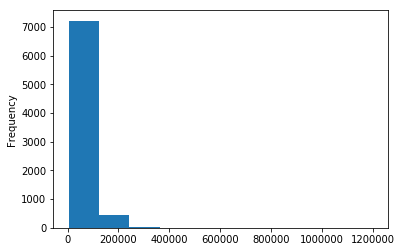

In [13]:
df.income.plot.hist(bins =10)

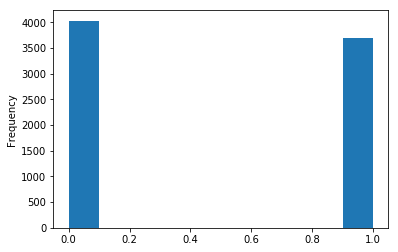

In [10]:
df.default.plot.hist()

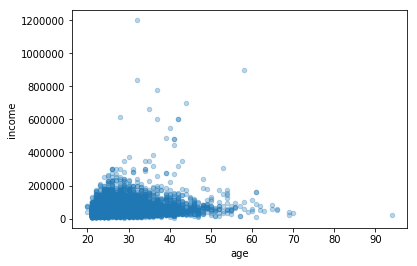

In [14]:
df.plot.scatter(x='age', y ='income', alpha=0.3)

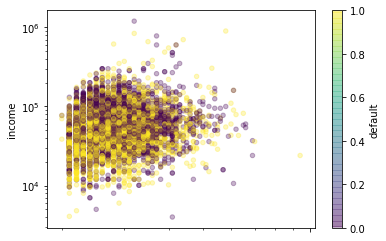

In [17]:
df.plot.scatter(x='age', y ='income', c='default', alpha=0.3, cmap='viridis', logx=True, logy=True);

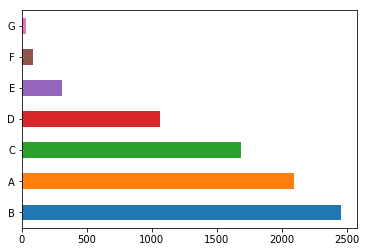

In [18]:
df.grade.value_counts().plot.barh()

In [21]:
from sklearn.preprocessing import LabelEncoder

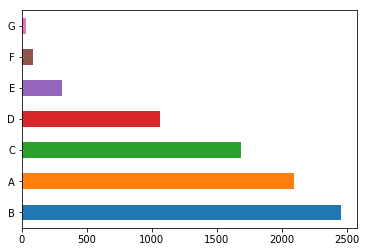

In [23]:
# Explore grade
df.grade.value_counts().plot.barh()

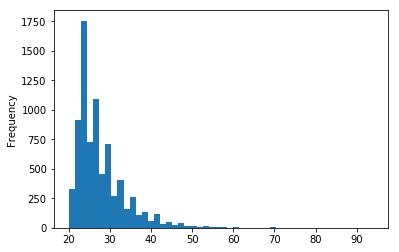

In [24]:
df.age.plot.hist(bins=50)

In [25]:
df.age.max()

94

In [26]:
df[df.age == 94]

,default,amount,grade,years,ownership,income,age
7714,1,6500,C,1.0,RENT,24000.0,94


In [27]:

df.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


In [22]:
le_grade = labelEncoder()
le_ownership = labelEncoder()

NameError: name 'labelEncoder' is not defined

In [28]:
df_encoded = df.copy()

In [29]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [31]:

# Ownership - Label Encoder
le_ownership = LabelEncoder()
le_ownership.fit(df.ownership)
df_encoded["ownership"] = le_ownership.transform(df.ownership)

In [36]:

dfX = pd.get_dummies(df_encoded)

In [37]:
dfX.head()

,default,amount,years,ownership,income,age,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,0,1000,2.0,3,19200.0,24,0,1,0,0,0,0,0
1,1,6500,2.0,0,66000.0,28,1,0,0,0,0,0,0
2,0,2400,2.0,3,60000.0,36,1,0,0,0,0,0,0
3,0,10000,3.0,3,62000.0,24,0,0,1,0,0,0,0
4,1,4000,2.0,3,20000.0,28,0,0,1,0,0,0,0


In [38]:
# Total number of columns
len(list(dfX.columns))

13

In [39]:
X = dfX.iloc[:,1:7]

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
dt = DecisionTreeClassifier(max_depth=0)

In [44]:
dt.fit(X,y)

NameError: name 'y' is not defined

In [45]:
X = dfT.iloc[:, 1:13]
y = dfT.default

In [46]:
clf_dt = DecisionTreeClassifier(max_depth=10, random_state=42)

In [47]:
clf_dt.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [48]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [50]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [51]:
def cross_val(clf, k):
    
    # Instantiate Stratified K-Fold
    kf = StratifiedKFold(n_splits=k)
    
    # Let's use array to keep the scores
    kfold_train_scores = []
    kfold_val_scores = []
    
    # Run Stratified KFold Cross Validation
    for train_index, test_index in kf.split(X,y):
        clf = clf.fit(X.iloc[train_index], y.iloc[train_index])
        
        y_pred_train = clf.predict(X.iloc[train_index])
        train_acc = accuracy_score(y.iloc[train_index], y_pred_train)
        
        y_pred = clf.predict(X.iloc[test_index])
        val_acc = accuracy_score(y.iloc[test_index], y_pred)
        
        #print(train_acc, val_acc)
        kfold_train_scores.append(train_acc)
        kfold_val_scores.append(val_acc)
        
    #print("Mean Score \n")
    return (np.mean(kfold_train_scores), np.mean(kfold_val_scores))

In [52]:
cross_val(clf_dt, 5)

(0.7468299472962483, 0.6279335334530702)

In [53]:
def clf_depth(clf, depth):
    train_acc_scores = []
    val_acc_scores = []
    depth = np.arange(1,20)
    for i in depth:
        clf = clf.set_params(max_depth = i)
        train_acc, val_acc = cross_val(clf, 5)
        train_acc_scores.append(train_acc)
        val_acc_scores.append(val_acc)
        
    df_scores = pd.DataFrame({
        "depth": depth,
        "train_acc": train_acc_scores,
        "val_acc": val_acc_scores
    })
    df_scores.index = df_scores.depth
    
    df_scores.train_acc.plot()
    df_scores.val_acc.plot()

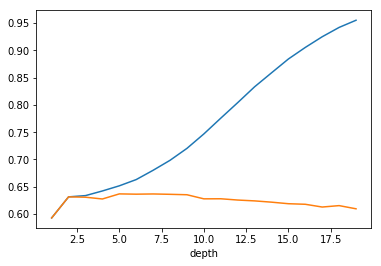

In [54]:
clf_depth(clf_dt, 20)

In [55]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

In [56]:
dfX = df.copy()

In [57]:
df.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


In [59]:

from sklearn.preprocessing import LabelEncoder

le_grade = LabelEncoder()
le_ownership = LabelEncoder()

# Fit the label encoder
le_grade.fit(df.grade)
le_ownership.fit(df.ownership)

LabelEncoder()

dfX["grade"] = le_grade.transform(df.grade)
dfX["ownership"] = le_ownership.transform(df.ownership)

le_grade.classes_, le_ownership.classes_



(array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object),
 array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object))

In [60]:
# Transform - Log
dfX["income"] = np.log(df.income)
dfX["amount"] = np.log(df.amount)
dfX["age"] = np.log(df.age)

In [61]:
dfX.head()

,default,amount,grade,years,ownership,income,age
0,0,6.907755,1,2.0,3,9.862666,3.178054
1,1,8.779557,0,2.0,0,11.097410,3.332205
2,0,7.783224,0,2.0,3,11.002100,3.583519
3,0,9.210340,2,3.0,3,11.034890,3.178054
4,1,8.294050,2,2.0,3,9.903488,3.332205


In [62]:
X = dfX.iloc[:,1:7 ]
y = dfX.default

In [63]:
# Build a model - Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=10)

dt.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [64]:
def pred_df(clf, X, y):
    y_pred = dt.predict(X)
    y_pred_proba = dt.predict_proba(X)[:,1]
    pred_df = pd.DataFrame({
        "actual": y,
        "predicted": y_pred,
        "probability": y_pred_proba
    })
    return pred_df

In [65]:
dt_pred = pred_df(dt, X, y)
dt_pred.head()

,actual,predicted,probability
0,0,0,0.416667
1,1,0,0.171617
2,0,0,0.000000
3,0,1,0.602484
4,1,1,0.547368


model evaluation


validation curve

In [66]:
from sklearn.model_selection import validation_curve

In [67]:
param_range = np.arange(2,20)

In [69]:
validation_curve(dt, X, y, "max_depth", param_range=param_range, cv=5, scoring='roc_auc')

(array([[0.66833678, 0.67606679, 0.6698353 , 0.65356566, 0.65076492],
        [0.68565868, 0.69388269, 0.68620457, 0.67079466, 0.66867865],
        [0.6978926 , 0.70442073, 0.69769201, 0.68008435, 0.67931374],
        [0.71115135, 0.71636021, 0.70923706, 0.69516558, 0.69082912],
        [0.72977934, 0.73499366, 0.72763436, 0.7150588 , 0.70974747],
        [0.75244462, 0.75839252, 0.74970314, 0.73782663, 0.73170898],
        [0.78168738, 0.78667707, 0.77840323, 0.76133398, 0.75991733],
        [0.81462737, 0.8169435 , 0.80786763, 0.79527026, 0.79415823],
        [0.84482037, 0.84936184, 0.83890503, 0.83052006, 0.83067421],
        [0.87692959, 0.88567482, 0.87019918, 0.86272014, 0.86691016],
        [0.90174029, 0.91685168, 0.90270597, 0.89269243, 0.90056364],
        [0.92306864, 0.94421977, 0.93120771, 0.91830132, 0.92693517],
        [0.94102326, 0.9660332 , 0.95182682, 0.93991014, 0.94955011],
        [0.95409849, 0.97950556, 0.96757846, 0.95631458, 0.96838955],
        [0.96423892,

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=1, )

In [81]:
pwd

'D:\\python3'

In [83]:
!pip install sklearn

  Could not fetch URL https://pypi.org/simple/sklearn/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/sklearn/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate (_ssl.c:1045)'))) - skipping


  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate (_ssl.c:1045)'))': /simple/sklearn/
  Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate (_ssl.c:1045)'))': /simple/sklearn/
  Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate (_ssl.c:1045)'))': /simple/sklearn/
  Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify 

In [84]:
!python -m pip install --upgrade pip

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate (_ssl.c:1045)'))) - skipping
Requirement already up-to-date: pip in d:\python3\lib\site-packages (10.0.1)


Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate (_ssl.c:1045)'))': /simple/pip/
Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate (_ssl.c:1045)'))': /simple/pip/
Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate (_ssl.c:1045)'))': /simple/pip/
Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed 

In [85]:
!python --version

Python 3.7.0


In [79]:
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

deploying the model

In [ ]:
##Serialize the object

In [87]:
!pip install sklearn.externals

  Could not fetch URL https://pypi.org/simple/sklearn-externals/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/sklearn-externals/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate (_ssl.c:1045)'))) - skipping


  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate (_ssl.c:1045)'))': /simple/sklearn-externals/
  Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate (_ssl.c:1045)'))': /simple/sklearn-externals/
  Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate (_ssl.c:1045)'))': /simple/sklearn-externals/
  Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERI

In [86]:
from sklearn.externals import joblist

ImportError: cannot import name 'joblist' from 'sklearn.externals' (D:\python3\lib\site-packages\sklearn\externals\__init__.py)

In [72]:
np.mean(train_score, axis=1).shape

NameError: name 'train_score' is not defined

In [71]:
df_val_curve = pd.DataFrame({
    "param":param_range,
    "train_score":train_score,
    "test_score":test_score
})

NameError: name 'train_score' is not defined

In [70]:
plt.plot(x=param_range, y=train_score)
plt.plot

NameError: name 'train_score' is not defined